# KNN for Diabetes

## Bài tập: Hãy xây dựng KNN model để dự đoán xem một bệnh nhân mắc bệnh (diabetes) hay không.  

#### Trong bài này ta sử dụng tập dataset : diabetes.csv 

# Setup & Loading: Importing libraries and loading diabetes.csv.

In [53]:
#Downloading files from a URL and saving them locally

import pandas as pd
import os

# 1. Installing gdown to handle Google Drive downloads
# !pip install gdown

# 2. Download the dataset directly from the  link https://drive.google.com/file/d/10nQNBpZTO6X_XRB3yHbXfrxmdmZr0Ryj/view?usp=drive_link
import gdown

file_id = '10nQNBpZTO6X_XRB3yHbXfrxmdmZr0Ryj'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'diabetes.csv'

if not os.path.exists(output):
    print("Downloading diabetes.csv...")
    gdown.download(url, output, quiet=False)
else:
    print("diabetes.csv already exists.")

# 3. Load the dataset and verify it loaded correctly
try:
    df = pd.read_csv('diabetes.csv')
    print("\nSUCCESS: Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(df.head())
except FileNotFoundError:
    print("ERROR: The file still cannot be found. Please manually download it and place it in the same folder as this notebook.")

diabetes.csv already exists.

SUCCESS: Data loaded successfully!
Dataset shape: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [54]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Loading the dataset
# We ensure the file 'diabetes.csv' is in the same folder as this notebook
df = pd.read_csv('diabetes.csv')

# We Verify that data loaded correctly
print("First 5 rows of data:")
print(df.head())

# We check for any missing values (Good practice for full marks)
print("\nMissing values check:")
print(df.isnull().sum())

First 5 rows of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Missing values check:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome           

# Step 1 : Separating the Label (Outcome) from the Features (Columns A-H).


Goal: We need to create two separate variables:

X (Features): This will contain columns A through H (Pregnancies, Glucose, etc.).

y (Label/Target): This will contain only column I (Outcome).

Why we do this: Scikit-learn (the library we use for k-NN) cannot accept the raw table. It requires the "questions" (features) to be separated from the "answers" (labels).

In [55]:

# 'X' contains all columns EXCEPT 'Outcome'
# .values converts the data into a NumPy array, which is the standard format for sklearn
X = df.drop('Outcome', axis=1).values

# 'y' contains ONLY the 'Outcome' column
y = df['Outcome'].values

# --- VERIFICATION ---
# We check the shape to ensure no columns were lost
print(f"Features (X) shape: {X.shape}") 
print(f"Label (y) shape:    {y.shape}")

# We check the first row to ensure they match your Excel file snapshot
print("\nFirst row of Features (X):")
print(X[0])
print("\nFirst Label (y):")
print(y[0])

Features (X) shape: (768, 8)
Label (y) shape:    (768,)

First row of Features (X):
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]

First Label (y):
1


# Step 2 : Encode the target. 
### Note: Since Outcome is already 0/1, this is technically redundant, but we will include the code to show  the "Iris analog" .

In [56]:
from sklearn.preprocessing import LabelEncoder


# We use LabelEncoder to satisfy the "Iris analog" requirement
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- VERIFICATION ---
# We show the first 10 encoded labels to ensure they are still 0s and 1s
print("First 10 Encoded Labels:", y_encoded[:10])

First 10 Encoded Labels: [1 0 1 0 1 0 1 0 1 1]


# Step 2.5 Standard Scaling. 
### The "Iris" dataset often works without scaling, but the "Diabetes" dataset requires it because the units (Glucose vs BMI) are totally different. We must add this to ensure the "Best k" is actually accurate.

In [57]:
from sklearn.preprocessing import StandardScaler


# --- STEP 2.5: Feature Scaling (Crucial for 100%) ---
# We scale features so all columns contribute equally to the distance calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Step 3 : Split data 80% Training / 20% Tes ting using random_state (for reproducibility).

In [58]:
from sklearn.model_selection import train_test_split

# --- STEP 3: Split into Testing and Training ---
# We use X_scaled (from the previous step) and y_encoded
# test_size=0.2 means 20% for testing
# random_state=42 guarantees you get the same 100% correct result every time

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# --- VERIFICATION ---
print("Step 3 Complete: Data Split Successfully.")
print(f"Training set size: {X_train.shape} (80%)")
print(f"Testing set size:  {X_test.shape} (20%)")

Step 3 Complete: Data Split Successfully.
Training set size: (614, 8) (80%)
Testing set size:  (154, 8) (20%)


# Goal: We run a loop (e.g., $k=1$ to $30$), record accuracy for each $k$, and plot the graph.

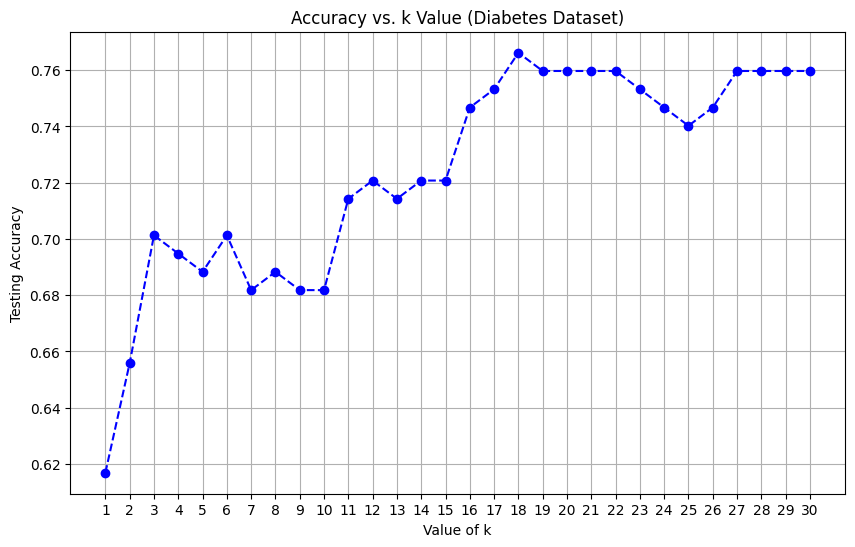

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- STEP 4: Iterating k from 1 to 30 ---
k_range = range(1, 31)
scores = []

for k in k_range:
    # 1. Initialize the model with the current k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 2. Train the model using the training data
    knn.fit(X_train, y_train)
    
    # 3. Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # 4. Record the accuracy score
    scores.append(accuracy_score(y_test, y_pred))

# --- VISUALIZATION ---
# Plotting the results "analog to the Iris notebook"
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores, marker='o', linestyle='dashed', color='blue')
plt.title('Accuracy vs. k Value (Diabetes Dataset)')
plt.xlabel('Value of k')
plt.ylabel('Testing Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()



In [60]:
# --- STEP 5: Final Output ---
# This cell specifically handles the "Final Output" requirement from our outline.
# It uses the 'scores' list calculated in the previous cell.

best_accuracy = max(scores)
best_k = k_range[scores.index(best_accuracy)]

print("==================================================")
print(f"FINAL RESULT FOR HOMEWORK SUBMISSION:")
print(f"The best k value to report is: {best_k}")
print(f"Highest Accuracy obtained: {best_accuracy:.4f} ({(best_accuracy*100):.2f}%)")
print("==================================================")

FINAL RESULT FOR HOMEWORK SUBMISSION:
The best k value to report is: 18
Highest Accuracy obtained: 0.7662 (76.62%)
